# Find clusters of sales data using HDBSCAN

**For more explanation about HDBSCAN, check out [my video!](https://youtu.be/bvUs8KB--5c)** 

In [1]:
!pip install ucimlrepo
!pip install tslearn
!pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 65.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.22.0 requires google-cloud-bigquery[bqstorage,pandas]>=3.10.0, but you have google-cloud-bigquery 2.34.4 which is incompatible.
bigframes 0.22.0 requires google-cloud-storage>=2.0.0, but you have google-cloud-storage 1.44.0 which is incompatible.
bigframes 0.22.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.2 which is incompatible.
dataproc-jupyter-plugin 0.1.79 requires pydantic~=1.10.0, but you have pydantic 2.8.2 which is incompatible.
spaghetti 1.7.6 requires 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import HDBSCAN
from sklearn.metrics.pairwise import pairwise_distances
import tslearn
from tslearn.metrics import cdist_dtw
from ucimlrepo import fetch_ucirepo

In [3]:
import sklearn
sklearn.__version__

'1.5.1'

In [4]:
sales_transactions_weekly = fetch_ucirepo(id=396)
X = sales_transactions_weekly.data.features
print(sales_transactions_weekly.metadata)
print(sales_transactions_weekly.variables)

{'uci_id': 396, 'name': 'Sales Transactions Weekly', 'repository_url': 'https://archive.ics.uci.edu/dataset/396/sales+transactions+dataset+weekly', 'data_url': 'https://archive.ics.uci.edu/static/public/396/data.csv', 'abstract': 'Contains weekly purchased quantities of 800 over products over 52 weeks. Normalised values are provided too.', 'area': 'Business', 'tasks': ['Clustering'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 811, 'num_features': 106, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['Product_Code'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Mar 15 2024', 'dataset_doi': '10.24432/C5XS4Q', 'creators': ['James Tan'], 'intro_paper': {'title': 'Time Series Clustering: A Superior Alternative for Market Basket Analysis', 'authors': 'Swee Chuan Tan, Jess Pei San Lau', 'published_in': 'International Conference on Advanced Data and Informat

In [5]:
print(X.shape)
X.head()

(811, 106)


,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,11,12,10,8,13,12,14,21,6,14,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,7,6,3,2,7,1,6,3,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,7,11,8,9,10,8,7,13,12,6,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,12,8,13,5,9,6,9,13,13,11,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,8,5,13,11,6,7,9,14,9,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


In [6]:
df = X.iloc[:, :52]

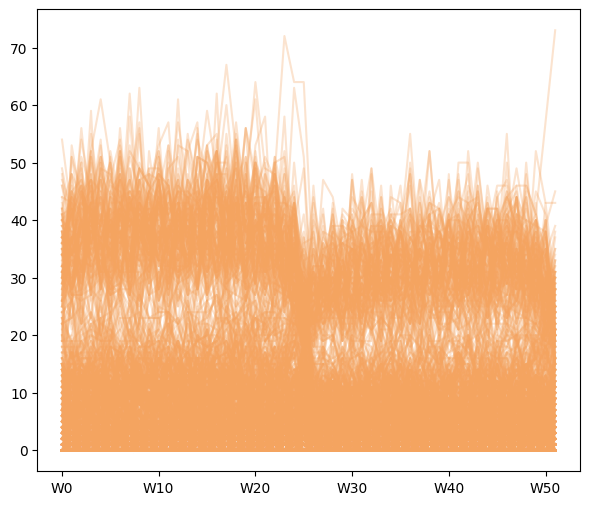

In [7]:
df.T.plot(color='sandybrown', alpha=0.3, legend=False, figsize=(7,6));

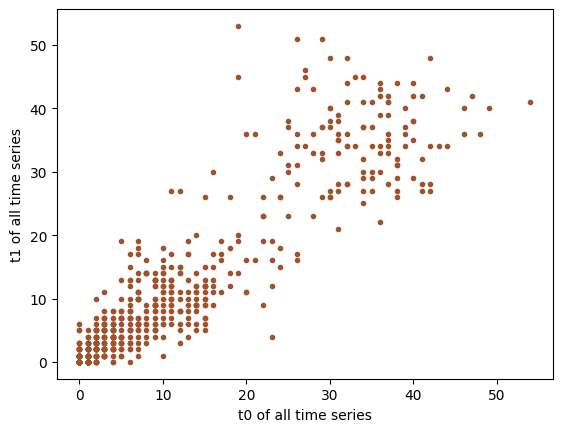

In [8]:
plt.plot(df.iloc[:,0], df.iloc[:,1], '.', color='sienna')
plt.xlabel('t0 of all time series')
plt.ylabel('t1 of all time series');

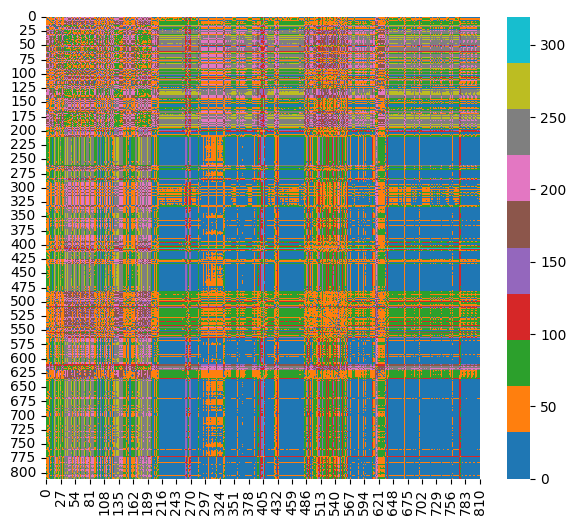

In [9]:
plt.figure(figsize=(7,6))
sns.heatmap(pairwise_distances(df, n_jobs=-1), cmap='tab10');

# Clustering

In [10]:
cluster = HDBSCAN().fit(df)

In [11]:
unique_cluster = np.sort(np.unique(cluster.labels_))
for i in unique_cluster:
    print(f'cluster {i}, {np.sum(cluster.labels_==i)}, {np.mean(cluster.labels_==i)}')

cluster -1, 155, 0.19112207151664612
cluster 0, 117, 0.1442663378545006
cluster 1, 11, 0.013563501849568433
cluster 2, 37, 0.04562268803945746
cluster 3, 491, 0.6054254007398274


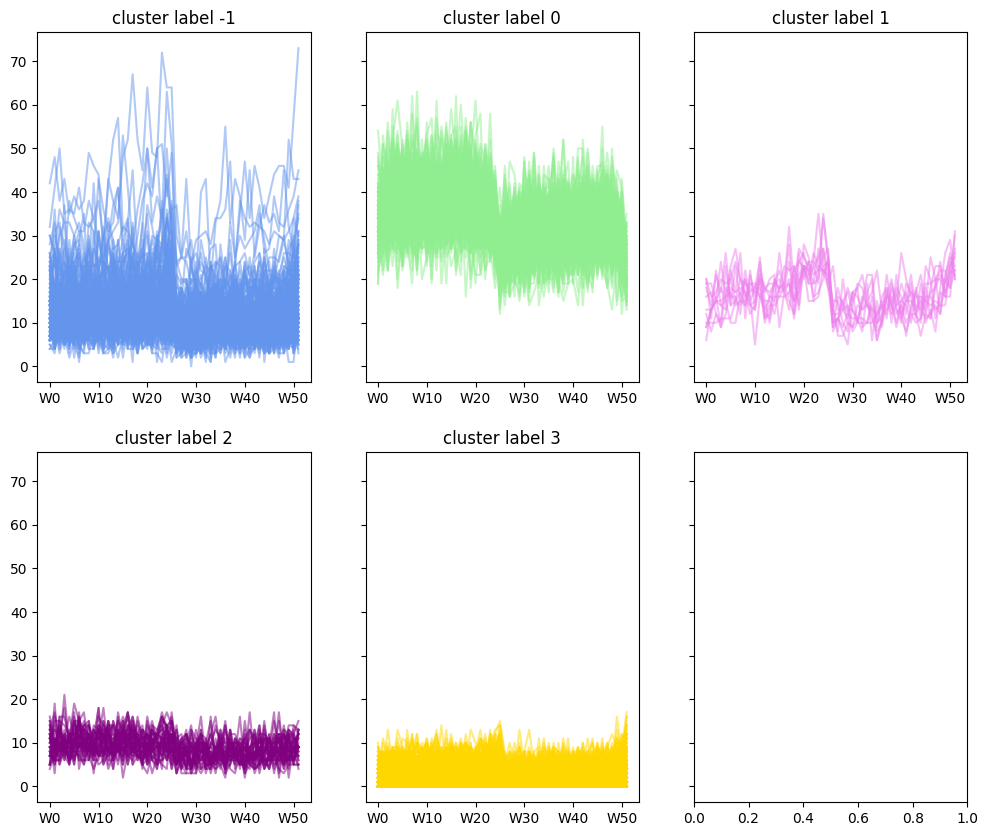

In [12]:
fig, ax = plt.subplots(2, 3, sharey=True, figsize=(12, 10))
colors = ['cornflowerblue', 'lightgreen', 'violet', 'purple', 'gold']
for i, a in enumerate(ax.flat):
    if i<5:
        df.loc[cluster.labels_==unique_cluster[i]].T.plot(color=colors[i], alpha=0.5, ax=a, legend=False)
        a.set_title(f'cluster label {unique_cluster[i]}')

# HDBSCAN x DTW

In [13]:
distances_dtw = cdist_dtw(df, n_jobs=4)

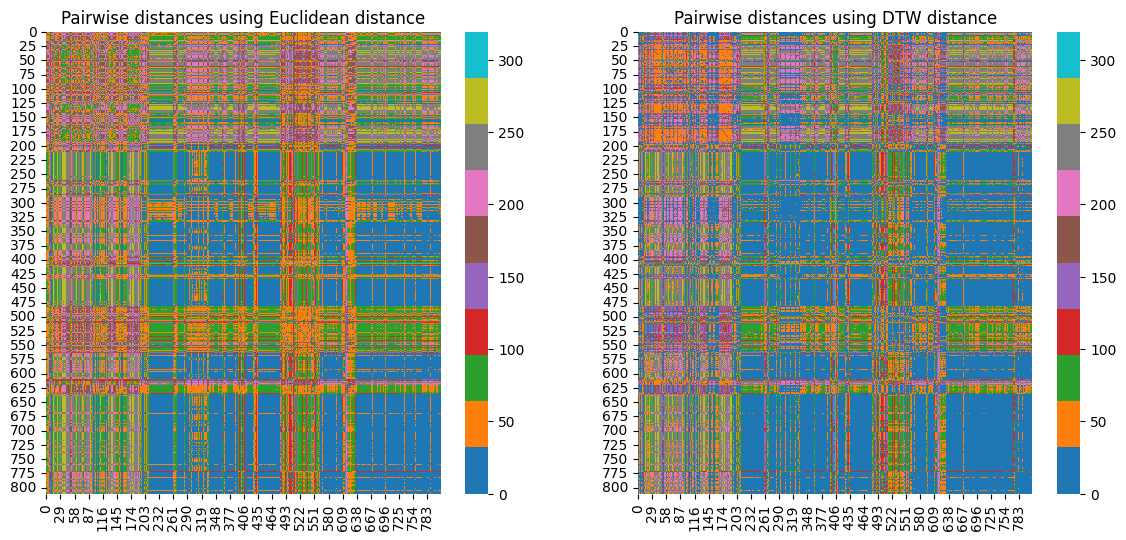

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.heatmap(pairwise_distances(df, n_jobs=-1), cmap='tab10', ax=ax[0])
sns.heatmap(distances_dtw, cmap='tab10', ax=ax[1])
ax[0].set_title('Pairwise distances using Euclidean distance')
ax[1].set_title('Pairwise distances using DTW distance');

In [15]:
cluster_dtw = HDBSCAN(metric='precomputed').fit(distances_dtw)

In [16]:
unique_cluster_dtw = np.sort(np.unique(cluster_dtw.labels_))
for i in unique_cluster_dtw:
    print(f'cluster {i}, {np.sum(cluster_dtw.labels_==i)}, {np.mean(cluster_dtw.labels_==i)}')

cluster -1, 480, 0.591861898890259
cluster 0, 114, 0.1405672009864365
cluster 1, 24, 0.029593094944512947
cluster 2, 5, 0.006165228113440197
cluster 3, 5, 0.006165228113440197
cluster 4, 5, 0.006165228113440197
cluster 5, 6, 0.007398273736128237
cluster 6, 6, 0.007398273736128237
cluster 7, 5, 0.006165228113440197
cluster 8, 17, 0.02096177558569667
cluster 9, 16, 0.01972872996300863
cluster 10, 8, 0.009864364981504316
cluster 11, 26, 0.032059186189889025
cluster 12, 6, 0.007398273736128237
cluster 13, 6, 0.007398273736128237
cluster 14, 7, 0.008631319358816275
cluster 15, 11, 0.013563501849568433
cluster 16, 10, 0.012330456226880395
cluster 17, 9, 0.011097410604192354
cluster 18, 12, 0.014796547472256474
cluster 19, 10, 0.012330456226880395
cluster 20, 23, 0.02836004932182491


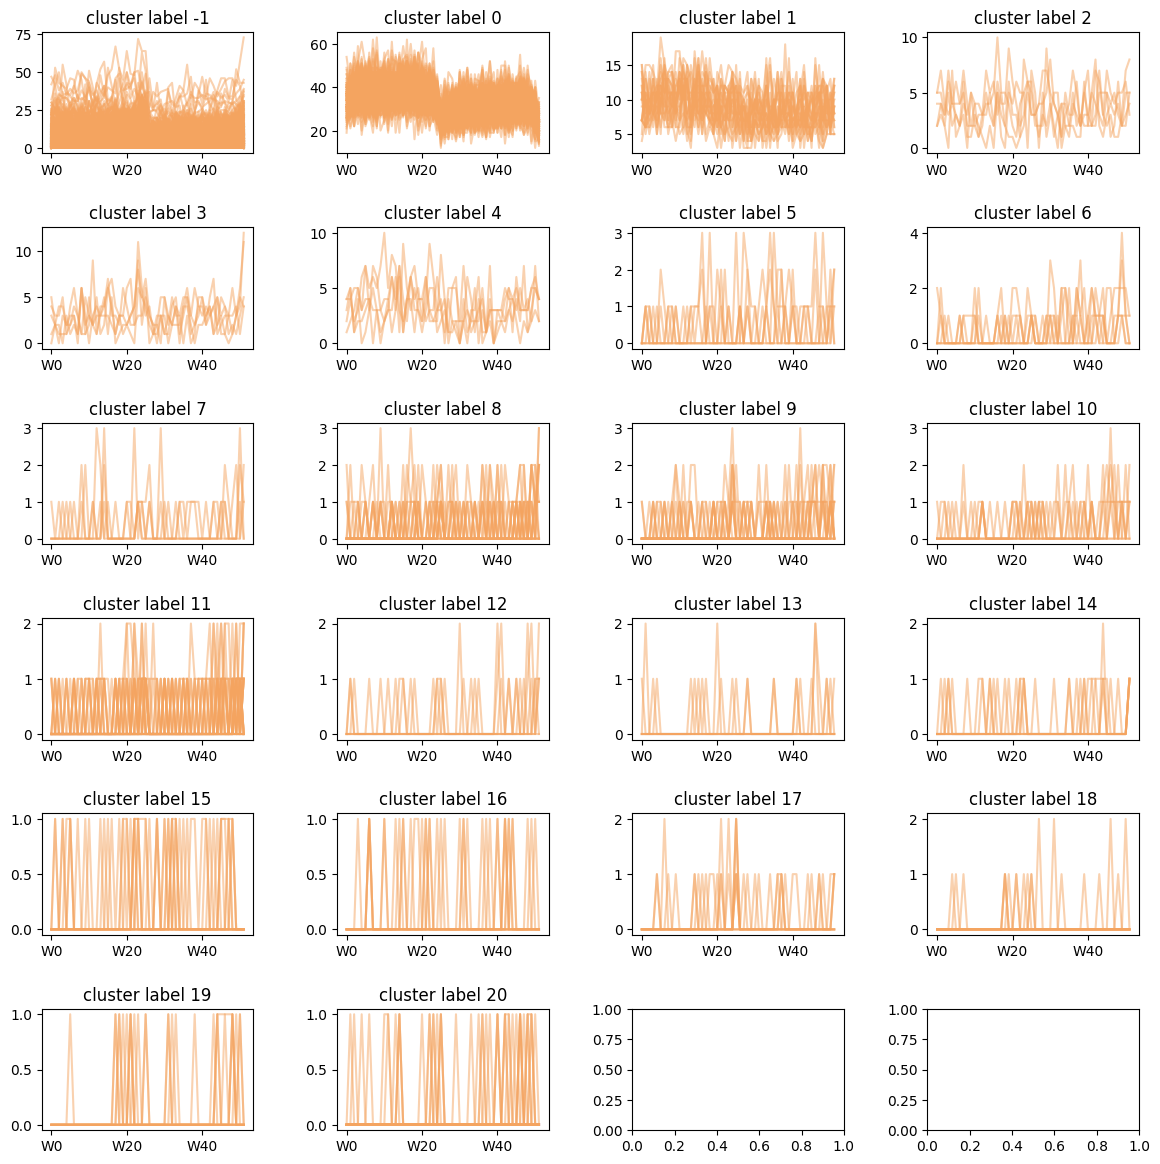

In [17]:
fig, ax = plt.subplots(6, 4, sharey=False, figsize=(12, 12))
for i, a in enumerate(ax.flat):
    try:
        df.loc[cluster_dtw.labels_==unique_cluster_dtw[i]].T.plot(color='sandybrown', alpha=0.5, ax=a, legend=False)
        a.set_title(f'cluster label {unique_cluster_dtw[i]}')
    except: break
plt.tight_layout(pad=2.0)

# Comparing cluster results by plotting the data point

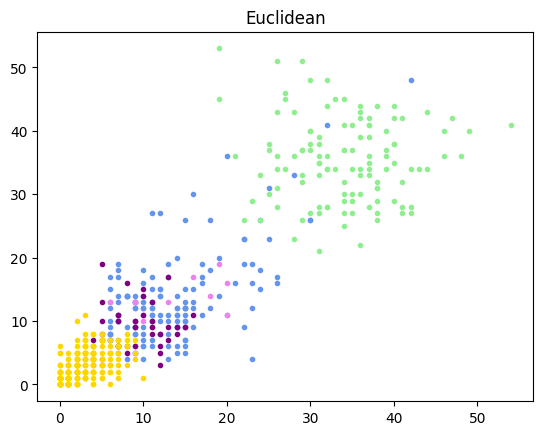

In [18]:
# with Euclidean (the default) metric
for col, label in zip(colors, unique_cluster):
    minidf = df.loc[cluster.labels_==label]
    plt.plot(minidf.iloc[:, 0], minidf.iloc[:, 1], '.', color=col)
plt.title('Euclidean');

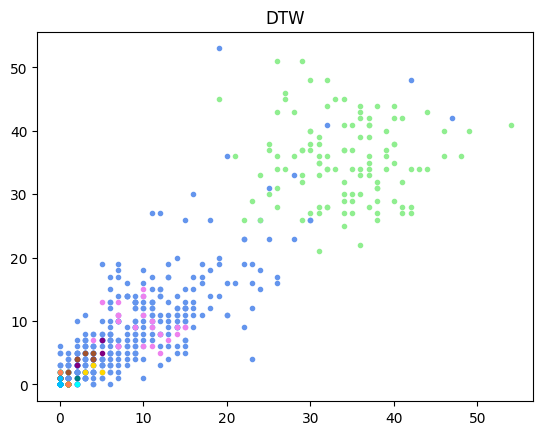

In [19]:
# with DTW metric
colors = ['cornflowerblue', 'lightgreen', 'violet', 'purple', 'gold',
          'sienna', 'salmon', 'teal', 'green', 'cyan',
          'yellow', 'blue', 'orange', 'magenta', 'coral',
          'chocolate', 'olive', 'orangered', 'maroon', 'red',
          'sandybrown', 'deepskyblue']
for col, label in zip(colors, unique_cluster_dtw):
    minidf = df.loc[cluster_dtw.labels_==label]
    plt.plot(minidf.iloc[:, 0], minidf.iloc[:, 1], '.', color=col)
plt.title('DTW');